In [25]:
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np

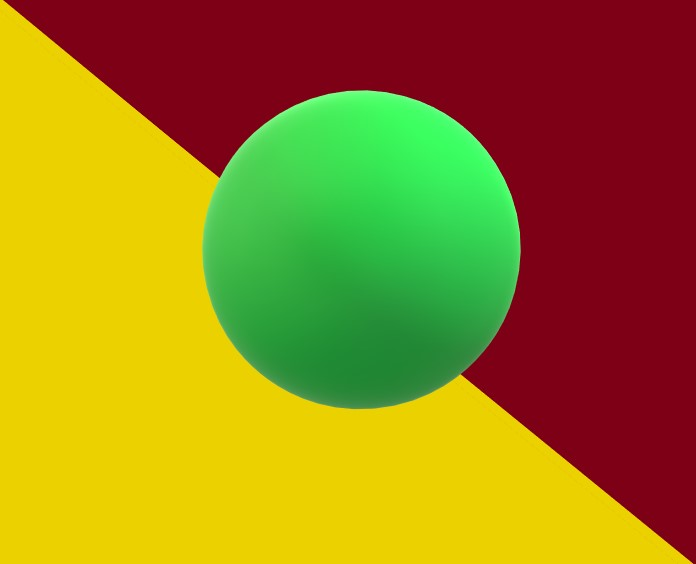

In [26]:
image = Image.open('ball3.jpg')

image

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


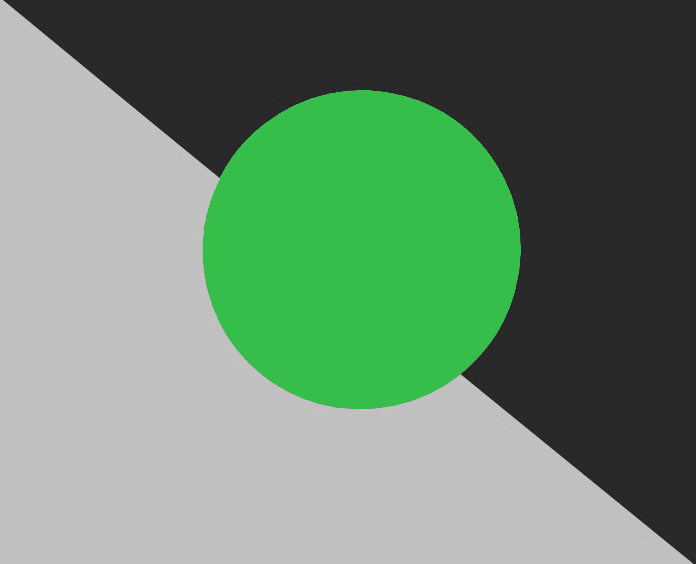

In [27]:
image_np = np.array(image)

pixels = image_np.reshape(-1, 3)

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixels)

green = np.array([0, 255, 0])
distances_to_ball = np.linalg.norm(kmeans.cluster_centers_ - green, axis=1)
green_cluster_index = np.argmin(distances_to_ball)
dominant_color_green = kmeans.cluster_centers_[green_cluster_index].astype(int)

labels = kmeans.labels_
object_mask = (labels == green_cluster_index).reshape(image_np.shape[:-1])

result_image_np = np.zeros_like(image_np)

result_image_np[object_mask] = dominant_color_green
for i in range(3):
    result_image_np[~object_mask, i] = np.dot(image_np[~object_mask, :3], [0.2989, 0.5870, 0.1140])

result_image = Image.fromarray(result_image_np)
result_image

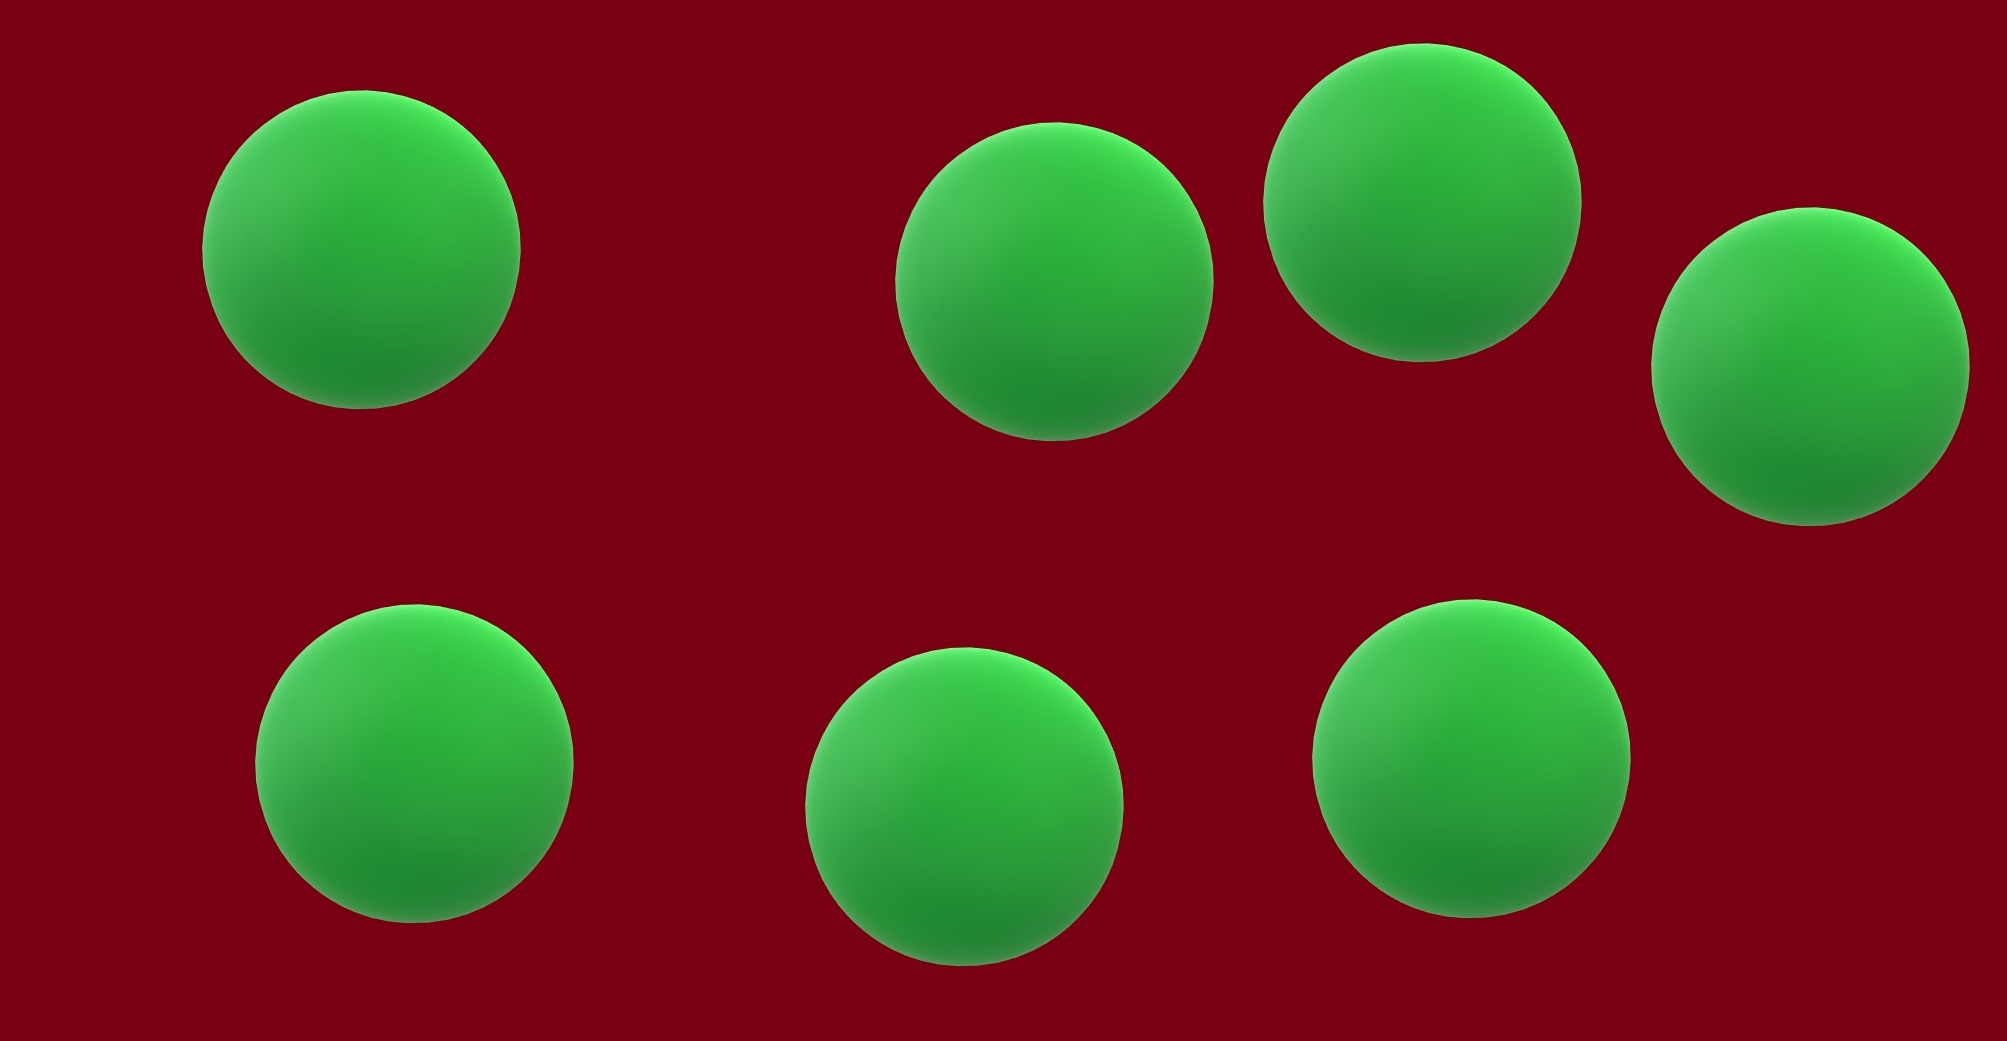

In [28]:
image = Image.open('balls.jpg')

image

In [29]:
image_np = np.array(image)

pixels = image_np.reshape(-1, 3)

num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

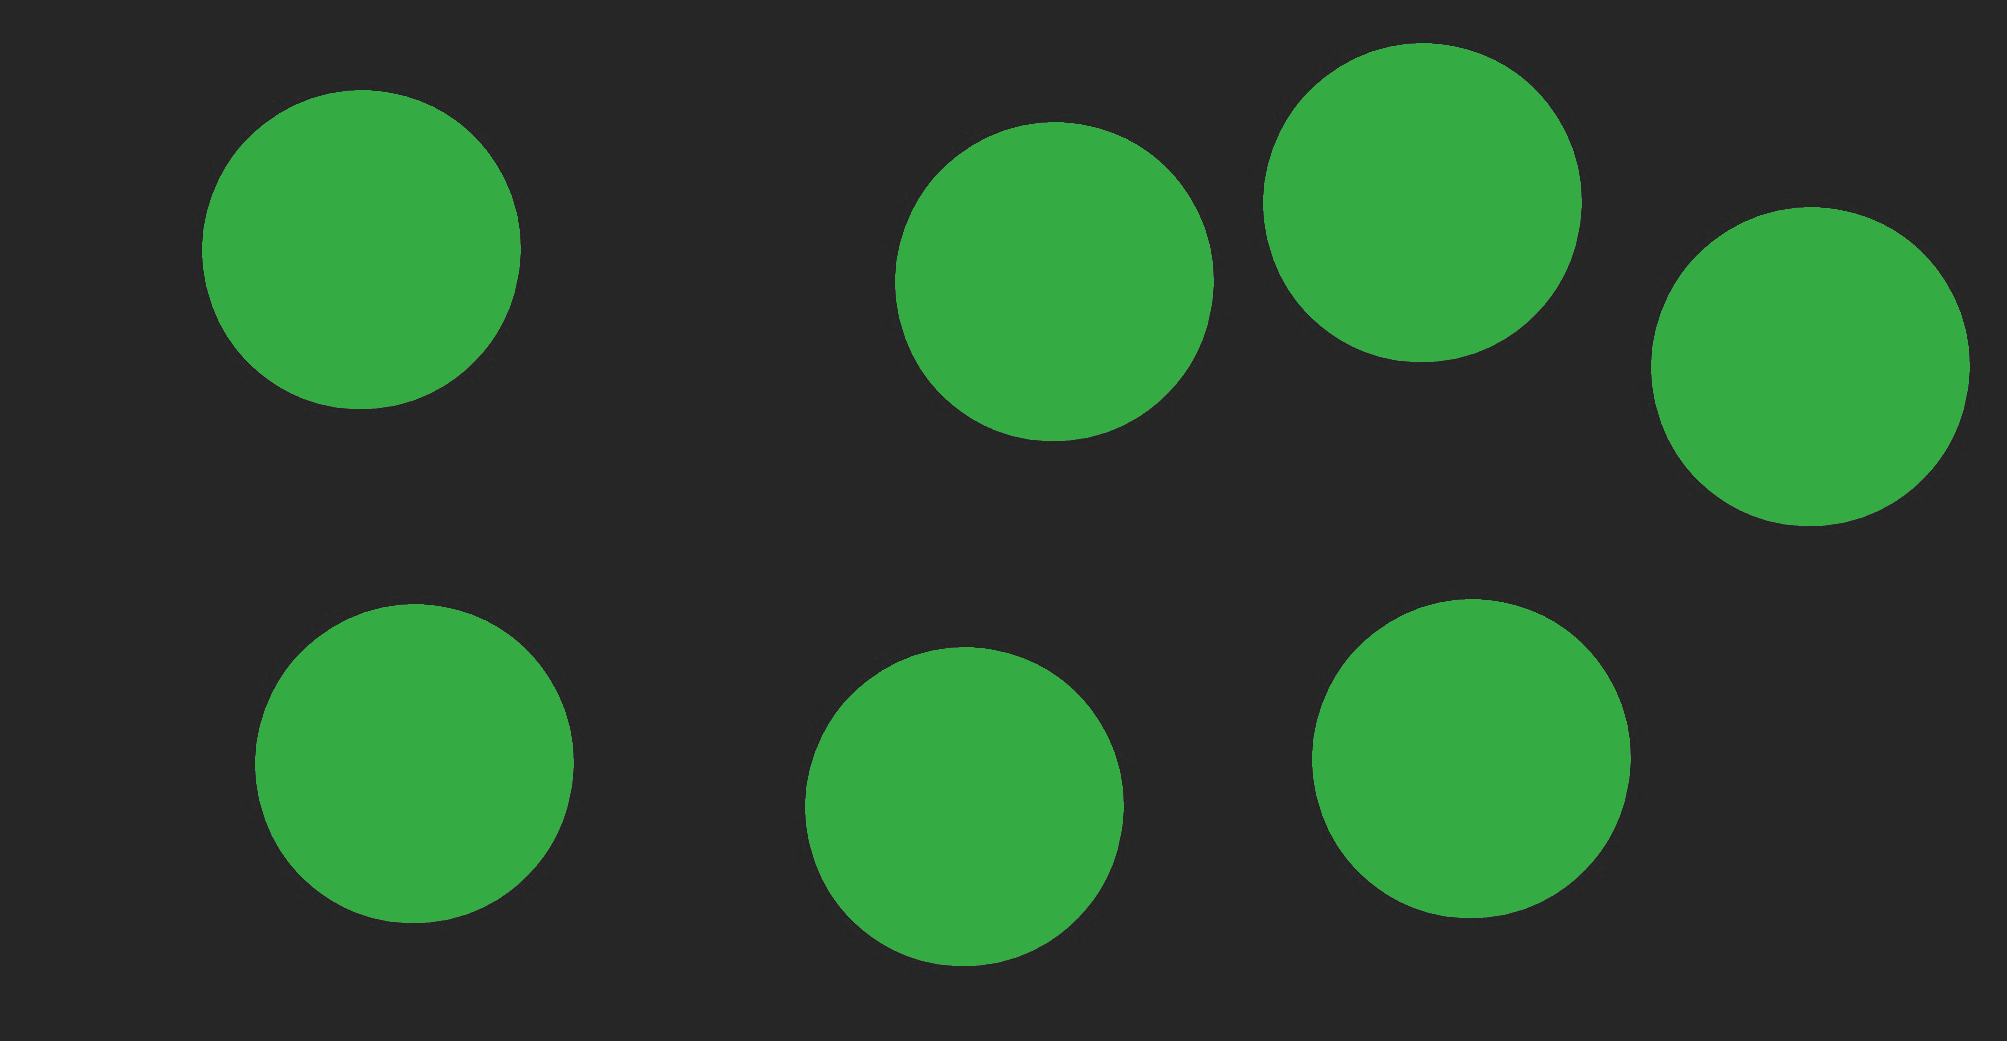

In [30]:
red_part = np.array([0, 255, 0])
distances_to_red = np.linalg.norm(kmeans.cluster_centers_ - red_part, axis=1)
red_cluster_index = np.argmin(distances_to_red)
dominant_color_red = kmeans.cluster_centers_[red_cluster_index].astype(int)

labels = kmeans.labels_
red_mask = (labels == red_cluster_index).reshape(image_np.shape[:-1])

result_image_np = np.zeros_like(image_np)
result_image_np[red_mask] = dominant_color_red

gray_values = np.dot(image_np[~red_mask, :3], [0.2989, 0.5870, 0.1140]).astype(int)

for i in range(3):
    result_image_np[~red_mask, i] = gray_values


result_image = Image.fromarray(result_image_np)
result_image